<a href="https://colab.research.google.com/github/francobarrionuevoenv21/MHW_xarray_mapping/blob/main/nbks_examples/exampleMHW_Anim_Urg-Brz17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Notebook description**
---
This notebook shows a usage example of the MHW XArray Mapping module to create maps of ocean warming events intensity using the methodology defined by [Hobday et al. (2016)](https://www.sciencedirect.com/science/article/abs/pii/S0079661116000057). Input data must be Sea Surface Temperature (SST) with a daily temporal resolution. For further information check the GitHub repo documentation.

This notebook works with example data for the Uruguay-Brazil coast region provided in the GitHub repo.

In [ ]:
# Clone GitHub repo
!git clone https://github.com/francobarrionuevoenv21/MHW_xarray_mapping.git

# Add the module path to use it as a Python package
import sys
sys.path.append("/content/MHW_xarray_mapping")

# Install Cartopy if necessary
#!pip install cartopy

In [13]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Import MHW mapping module
from mhwxamap.mhwMap import mapIntensityCont as micn

In [94]:
# Define main parameters
## NOTE: For further details about other parameters check documentation in the repo
PATH_SST = "/content/MHW_xarray_mapping/data_example/oisst_1983-2018_TestSubset.nc" ## Define SST data path
MHW_START = "2017-02-15" ## Define date to map. It could be the MHW peak or any other data to analyze
MHW_END = "2017-03-15"

In [59]:
from datetime import datetime as dt
from datetime import timedelta

In [96]:
dt_start = dt.strptime(MHW_START, "%Y-%m-%d")
dt_end = dt.strptime(MHW_END, "%Y-%m-%d")

list_dates = []

dt_mov = dt_start

for i in range((dt_end - dt_start).days + 1):
  list_dates.append(dt_mov.strftime("%Y-%m-%d"))
  dt_mov = dt_mov + timedelta(days=1)

/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


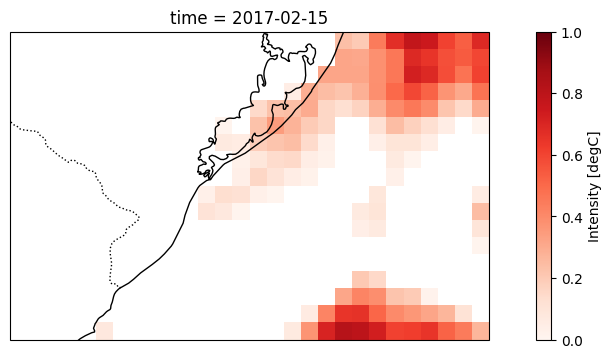

In [100]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(figsize=(12, 4), subplot_kw={'projection': ccrs.PlateCarree()})

# Initial frame
da0 = micn(PATH_SST, list_dates[0])
img = da0.plot(
    ax=ax,
    vmin=0,
    vmax=1,
    cmap="Reds",
    add_colorbar=True
)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

def update(frame):
    da = micn(PATH_SST, list_dates[frame])
    img.set_array(da.values.flatten())   # update image data
    ax.set_title(f"time = {list_dates[frame]}")
    return img,

ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(list_dates),
    interval=2000
)

ani = animation.FuncAnimation(fig, update, frames=len(list_dates))
ani.save("animation04.gif", writer="ffmpeg")

In [68]:
list_dates

['2017-02-15',
 '2017-02-16',
 '2017-02-17',
 '2017-02-18',
 '2017-02-19',
 '2017-02-20',
 '2017-02-21',
 '2017-02-22',
 '2017-02-23',
 '2017-02-24',
 '2017-02-25',
 '2017-02-26',
 '2017-02-27',
 '2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-03-04',
 '2017-03-05',
 '2017-03-06',
 '2017-03-07',
 '2017-03-08',
 '2017-03-09',
 '2017-03-10',
 '2017-03-11',
 '2017-03-12',
 '2017-03-13',
 '2017-03-14',
 '2017-03-15']

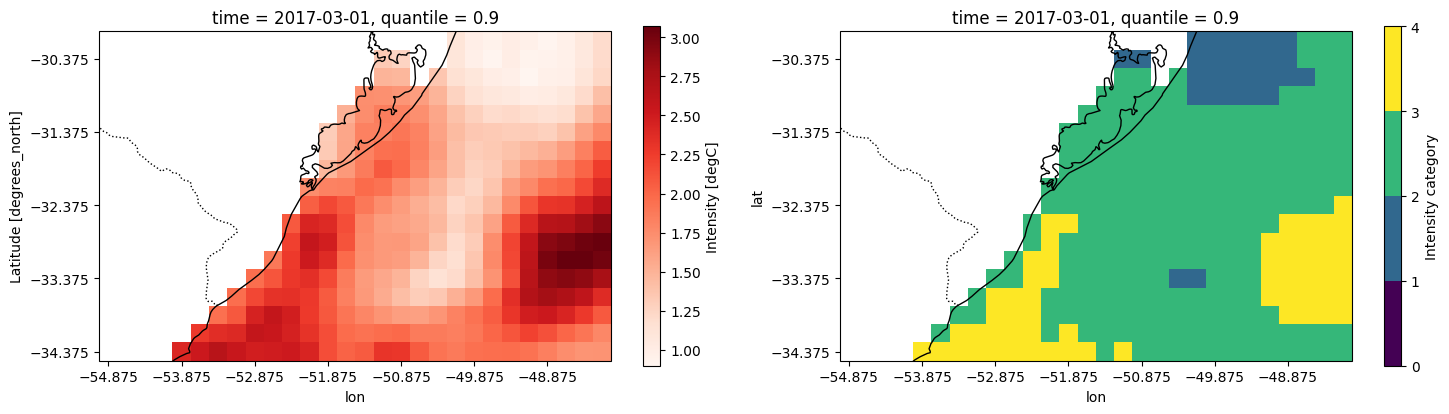

In [29]:
# Plot MHW intensity maps
fig, axs = plt.subplots(1, 2, figsize=(15, 4), subplot_kw={'projection': ccrs.PlateCarree()})

map_cont.plot(ax = axs[0], cmap ="Reds")
map_catg.plot(ax = axs[1], vmin = 0, vmax = 4, levels = 5)

for i in range(2):
  axs[i].add_feature(cfeature.COASTLINE)
  axs[i].add_feature(cfeature.BORDERS, linestyle=':')
  axs[i].set_xticks(np.arange(map_cont.lon.min(), map_cont.lon.max(), 1),
                    crs=ccrs.PlateCarree())
  axs[i].set_yticks(np.arange(map_cont.lat.min(), map_cont.lat.max(), 1),
                    crs=ccrs.PlateCarree())

plt.tight_layout()